<h2>Detecção e Remoção de Outliers</h2>

<h4>Detectando Outliers</h4>

Além de uma análise visual/gráfica, podemos também utilizar métodos estatísticos para verificar a presença de outliers:

- Dispersão: desvio padrão e intervalo interquartil (interquantile range)
- Distribuição: normal univariada
- Agrupamento

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('./dados/houses_to_rent_mba2.csv')
data.head()

,city,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type
0,São Paulo,70.0,2.0,1,1.0,7,2065,3300,211,42,5618.0,324,23,108,3,flat
1,São Paulo,320.0,4.0,4,2.0,20,1200,4960,1750,63,7973.0,720,78,240,11,flat
2,Porto Alegre,80.0,1.0,1,1.0,6,1000,2800,nr,41,3841.0,64,269,128,38,flat
3,Porto Alegre,51.0,1.0,1,NaN,2,270,1112,22,17,1421.0,46,73,92,10,flat
4,São Paulo,25.0,1.0,1,NaN,1,0,800,25,11,836.0,1548,78,516,11,flat


Primeiro, podemos apenas desenvolver uma breve análise visual, para entender como estão os dados

<AxesSubplot:>

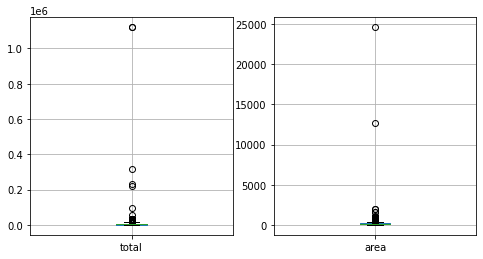

In [2]:
plt.figure(figsize=(8,4))
plt.subplot(121); data.boxplot(['total'])
plt.subplot(122); data.boxplot(['area'])

Desvio-padrão (sigma) e amplitude inter-quartil (IQR = Q3 - Q1)

- Q1: valor relativo aos primeiros 25% dos dados
- Q2: valor relativo aos primeiros 50% dos dados (mediana)
- Q3: valor relativo aos primeiros 75% dos dados

Os outliers estão localizados abaixo da linha dos dados de Q1 - 1,5xIQR e acima da linha dos dados de Q3 + 1,5xIQR

Para o caso de se considerar o desvio-padrão, ao considerar-se uma distribuição normal, por exemplo, temos:

- Q3 = 0.6745 x desv-pad
- Q1 = -0.6745 x desv-pad
- Q3 + 1,5xIQR = 2,695 x desv-pad
- Q1 - 1,5xIQR = - 2,695 x desv-pad

In [3]:
data.describe()

,area,rooms,bathroom,parking spaces,hoa,rent,insurance,total,page hits,days available,interactions,weeks available
count,11687.000000,11686.000000,11765.000000,8800.000000,1.176500e+04,11765.000000,11765.000000,1.176500e+04,11765.000000,11765.000000,11765.000000,11765.000000
mean,145.652691,2.496406,2.280408,2.181705,1.162632e+03,4033.429154,56.525032,5.622370e+03,593.139992,73.644454,228.023969,10.307012
std,288.676311,1.165594,1.445071,1.519448,1.486720e+04,3564.190560,97.487374,1.579576e+04,559.727661,35.725794,174.183959,5.101312
min,1.000000,1.000000,1.000000,1.000000,0.000000e+00,200.000000,3.000000,2.635000e+02,0.000000,0.000000,0.000000,0.000000
25%,56.000000,2.000000,1.000000,1.000000,1.600000e+02,1600.000000,22.000000,2.176000e+03,144.000000,51.000000,100.000000,7.000000
50%,91.000000,2.000000,2.000000,2.000000,5.610000e+02,2790.000000,37.000000,3.762000e+03,432.000000,72.000000,180.000000,10.000000
75%,190.000000,3.000000,3.000000,3.000000,1.300000e+03,5100.000000,70.000000,6.990000e+03,900.000000,93.000000,312.000000,13.000000
max,24606.000000,10.000000,25.000000,12.000000,1.117000e+06,45000.000000,6000.000000,1.119892e+06,6444.000000,358.000000,2148.000000,51.000000


In [4]:
Q1 = data['total'].quantile(0.25)
Q3 = data['total'].quantile(0.75)
IQR = Q3 - Q1

desvp = data['total'].std()
media = data['total'].mean()

print(f'IQR: {IQR:.2f}')
print(f'Média: {media:.2f}, Desvio Padrão: {desvp:.2f}')

IQR: 4814.00
Média: 5622.37, Desvio Padrão: 15795.76


In [5]:
dados_outliers_desvp = data[ ( data['total'] < media - ( desvp*2 ) ) | ( data['total'] > media + ( desvp*2 ) ) ]
dados_outliers_desvp.describe()

,area,rooms,bathroom,parking spaces,hoa,rent,insurance,total,page hits,days available,interactions,weeks available
count,7.000000,7.000000,7.000000,4.000000,7.000000e+00,7.000000,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000
mean,244.571429,2.428571,3.857143,3.750000,3.908343e+05,12797.142857,178.571429,4.517117e+05,657.428571,80.571429,287.142857,11.285714
std,230.635974,1.812654,1.951800,3.095696,5.035050e+05,15624.234076,234.632945,4.648007e+05,510.973860,26.550939,147.068497,3.817254
min,35.000000,1.000000,1.000000,1.000000,0.000000e+00,2500.000000,32.000000,5.442700e+04,264.000000,44.000000,144.000000,6.000000
25%,98.500000,1.000000,3.000000,1.750000,4.092000e+04,2790.000000,38.000000,1.588480e+05,351.000000,64.000000,162.000000,9.000000
50%,155.000000,1.000000,4.000000,3.000000,2.000000e+05,4500.000000,58.000000,2.331530e+05,432.000000,79.000000,264.000000,11.000000
75%,312.500000,4.000000,4.500000,5.000000,6.685000e+05,16000.000000,203.500000,7.184070e+05,792.000000,96.500000,369.000000,13.500000
max,700.000000,5.000000,7.000000,8.000000,1.117000e+06,45000.000000,677.000000,1.119892e+06,1620.000000,120.000000,540.000000,17.000000


In [6]:
dados_inliers_desvp = data[ ( data['total'] >= media - ( desvp*2 ) ) & ( data['total'] <= media + ( desvp*2 ) ) ]
dados_inliers_desvp.describe()

,area,rooms,bathroom,parking spaces,hoa,rent,insurance,total,page hits,days available,interactions,weeks available
count,11680.000000,11679.000000,11758.000000,8796.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000
mean,145.593408,2.496447,2.279469,2.180991,930.645348,4028.211771,56.452373,5356.795348,593.101718,73.640330,227.988774,10.306430
std,288.705325,1.165218,1.444316,1.518349,1151.665281,3541.282533,97.326654,4566.356503,559.773061,35.730994,174.198150,5.102046
min,1.000000,1.000000,1.000000,1.000000,0.000000,200.000000,3.000000,263.500000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,2.000000,1.000000,1.000000,160.000000,1600.000000,22.000000,2173.250000,144.000000,51.000000,100.000000,7.000000
50%,91.000000,2.000000,2.000000,2.000000,560.000000,2790.000000,37.000000,3760.000000,432.000000,72.000000,180.000000,10.000000
75%,190.000000,3.000000,3.000000,3.000000,1300.000000,5100.000000,70.000000,6990.000000,900.000000,93.000000,312.000000,13.000000
max,24606.000000,10.000000,25.000000,12.000000,32000.000000,30000.000000,6000.000000,32751.000000,6444.000000,358.000000,2148.000000,51.000000


<AxesSubplot:>

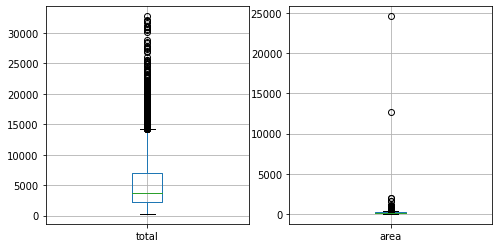

In [7]:
plt.figure(figsize=(8, 4))
plt.subplot(121); dados_inliers_desvp.boxplot(['total'])
plt.subplot(122); dados_inliers_desvp.boxplot(['area'])

Agora, podemos utilizar a estratégia de usar o IQR

In [8]:
dados_outliers_iqr = data[ ( data['total'] < Q1 - ( IQR*1.5 ) ) | ( data['total'] > Q3 + ( IQR*1.5 ) ) ]
dados_inliers_iqr = data[ ( data['total'] >= Q1 - ( IQR*1.5 ) ) & ( data['total'] <= Q3 + ( IQR*1.5 ) ) ]

<AxesSubplot:>

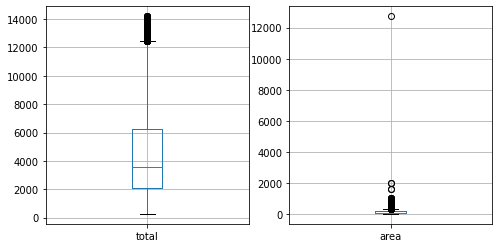

In [9]:
plt.figure(figsize=(8, 4))
plt.subplot(121); dados_inliers_iqr.boxplot(['total'])
plt.subplot(122); dados_inliers_iqr.boxplot(['area'])

In [10]:
def remove_outliers_IQR(df, attributes, factor=2):
    '''
    On this method, we take a Dataframe (df), the attributes (that would be a list) and the factor used with the IQR and default value as 2
    '''
    clear_df = df.copy()

    for att in attributes:

        # verifica se trata-se de um tipo de dado numérico (caso contrário, não será possível esse método diretamente)
        if np.issubdtype(df[att].dtype, np.number):
            Q1 = clear_df[att].quantile(0.25)
            Q3 = clear_df[att].quantile(0.75)
            IQR = Q3 - Q1

            # seleciona todas as colunas, verificando se as linhas em questão satisfazem os critérios mencionados
            clear_df = clear_df.loc[ ( df[att] >= Q1 - ( IQR*factor ) ) & ( df[att] <= Q3 + ( IQR*factor ) ), :]

    return clear_df

In [11]:
clear_data = remove_outliers_IQR(data, data.columns)

Text(0.5, 1.0, 'Dados após remoção de Outliers')

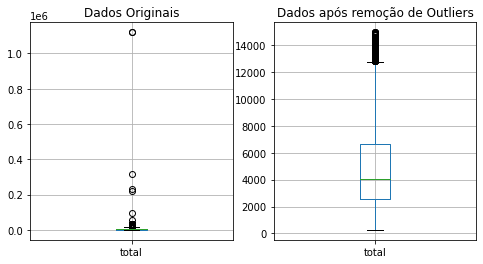

In [12]:
plt.figure(figsize=(8, 4))
plt.subplot(121); data.boxplot(['total'])
plt.title('Dados Originais')

plt.subplot(122); clear_data.boxplot(['total'])
plt.title('Dados após remoção de Outliers')

In [13]:
print(f'Dados originais: {data.shape[0]}')
print(f'Dados após remoção de Outliers: {clear_data.shape[0]}')

Dados originais: 11765
Dados após remoção de Outliers: 7461


<h3>Distribuição dos dados (distribuição Normal)</h3>

Nesse caso, assume-se que os dados possuem uma distribuição de probabilidade conhecida (Normal)

Desse modo, em nosso algoritmo teremos:

- Estimação dos parâmetros de distribuição
- Para cada ponto, cálculo da probabilidade 'p' de pertencer à distribuição
    - Caso $p < \epsilon$, considerar o ponto um outlier

- $\epsilon$ é um limiar (threshold)
- Em nossos exemplos, utilizaremos a distribuição Normal (Gaussiana), mas outras podem ser utilizadas

A distribuição Normal univariada (para uma única variável) é parametrizada por:

- média (centralidade)
- variância (dispersão)
- isso significa que os dados podem ser completamente descritos por esses dois valores

$X = N(\mu, \sigma^{2})$

Temos que a curva é dada através de uma exponencial

Gauss = $e^{\alpha}$

Onde temos $\alpha = - (x - \mu)^{2}/2\sigma^{2}$

In [15]:
mu = 5 # média = 5
s2 = 1 # variância = 1
x = np.arange(0, 10, 0.1)

print(x.shape)

(100,)


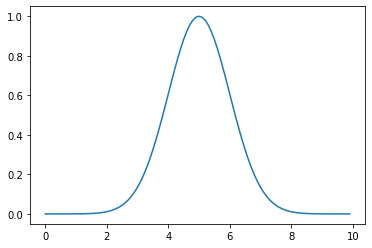

In [16]:
termo_gauss = np.exp( -( ( x-mu )**2 )/( 2*s2 ) )
plt.plot(x, termo_gauss)

A probabilidade de um determinado ponto x pertencer a X é dada por:

$p(x; \mu, \sigma^{2}) = e^{\alpha}/(\sigma\sqrt{2\pi})$

- Esse termo que divide a equação de reta da gaussiana serve para normalizar os valores, pois a soma de todas as probabilidades deve ser igual a 1

In [17]:
data['weeks available'].nunique()

50

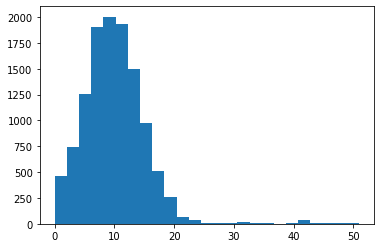

In [18]:
histograma_weeks_available = plt.hist(data['weeks available'], bins=25)

### Montar a função da gaussiana ###

In [32]:
def remove_outliers_gaussian(attribute, epsilon=0.001, plotdist=False):
    '''
    Nessa função, utilizamos os seguintes parâmetros:
        - attribute: atributo a ser analisado
        - epsilon: a faixa de tolerância
        - plotdist: permite plotar no gráfico os outliers que foram capturados com a análise
    '''

    media = np.mean(attribute)
    desvpad = np.std(attribute)

    curva_gaussiana = lambda x: np.exp( -( (x-media)**2/(2*(desvpad**2)) ) )
    termo_probabilidade = (1/(desvpad*np.sqrt(2*np.pi)))
    
    outliers = []

    for x, i in zip(attribute, range(0, len(attribute))):
        p = curva_gaussiana(x)*termo_probabilidade

        if p < epsilon:
            outliers.append(i)
        
    outliers = np.array(outliers)

    if plotdist:
        x = np.arange((media - 4*desvpad), (media + 4*desvpad), desvpad/100.0)

        plt.figure()
        plt.plot(x, curva_gaussiana(x))
        plt.plot(attribute[outliers], np.zeros(outliers.shape[0]), 'xr')
    
    return outliers

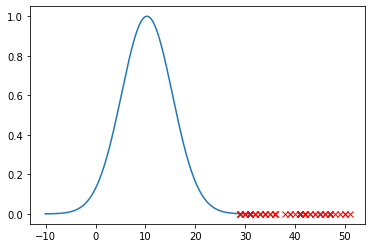

In [34]:
outliers_desvpad = remove_outliers_gaussian(data['weeks available'], epsilon=0.0001, plotdist=True)
# print(outliers_desvpad)